## CIS 4526 Foundations of Machine Learning Spring 2023 Homework 1
### Due Date: 03/5 23:59 pm

In [1]:
s = '/kaggle/input/salaries2/Salaries2.csv'
w = '/kaggle/input/wine-tasting/wine-tasting.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### This homework is on using all you have learned so far in model building to build a Linear Regression for a numerical target variables as well as a classfication problem.

***There are 2 parts in this homework. Make sure you follow the instructions and the proper model building workflow***


### Part 1 Predicting Professor Salary

1. Load the dataset
2. Perform EDA on this dataset
3. Remove outliers
4. Separate numerical features from categorical features
5. Build a two-factors model to predict the Salary with both YrsSincePhd and YrsOfService as its correlation is higher
6. Check if the model pass cross validation
7. Use one-hot encoding to include the Rank, Sex and Discipline along with the above numerical variable to build a second model.
8. Comment on whether the model improve or not after adding the categorical variables in terms of model performance as well as validation

### 1. Load the dataset

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
# Load the dataset
df = pd.read_csv(s)
df.head()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
0,Prof,B,19.0,18.0,Male,139750
1,Prof,B,20.0,16.0,Male,173200
2,AsstProf,B,4.0,3.0,Male,79750
3,Prof,B,45.0,39.0,Male,115000
4,Prof,B,40.0,41.0,Male,141500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          403 non-null    object 
 1   Discipline    403 non-null    object 
 2   YrsSincePhd   402 non-null    float64
 3   YrsOfService  402 non-null    float64
 4   Sex           401 non-null    object 
 5   Salary        403 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 19.0+ KB


In [6]:
df.describe()

,YrsSincePhd,YrsOfService,Salary
count,402.000000,402.000000,4.030000e+02
mean,22.258706,17.684080,1.160301e+05
std,12.870455,13.571541,5.398971e+04
min,1.000000,0.000000,5.780000e+04
25%,12.000000,7.000000,9.116350e+04
50%,21.000000,16.000000,1.073090e+05
75%,32.000000,26.000000,1.343675e+05
max,56.000000,101.000000,1.012100e+06


In [7]:
df.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.882785,0.189557
YrsOfService,0.882785,1.000000,0.154668
Salary,0.189557,0.154668,1.000000


In [8]:
df.tail()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
398,Prof,A,33.0,30.0,Male,103106
399,Prof,A,31.0,19.0,Male,150564
400,Prof,A,42.0,25.0,Male,101738
401,Prof,A,25.0,15.0,Male,95329
402,AsstProf,A,8.0,4.0,Male,81035


### First you need to do EDA

### 2. Perform EDA on this dataset

In [9]:
missing = df.columns[df.isna().any()].tolist()
missing

['YrsSincePhd', 'YrsOfService', 'Sex']

**Found missing values, not that much**

In [10]:
df.Sex.describe()

count      401
unique       2
top       Male
freq       362
Name: Sex, dtype: object

In [11]:
df[missing].describe()

,YrsSincePhd,YrsOfService
count,402.000000,402.000000
mean,22.258706,17.684080
std,12.870455,13.571541
min,1.000000,0.000000
25%,12.000000,7.000000
50%,21.000000,16.000000
75%,32.000000,26.000000
max,56.000000,101.000000


In [12]:
df[missing] = df[missing].fillna(df[missing].mean())
df.dropna(axis=0, how='any',inplace=True)
df[missing].isna().any()

YrsSincePhd     False
YrsOfService    False
Sex             False
dtype: bool

**Fill missing values with average and drop the row sample of missing Sex**

array([[<AxesSubplot:xlabel='YrsSincePhd', ylabel='YrsSincePhd'>,
        <AxesSubplot:xlabel='YrsOfService', ylabel='YrsSincePhd'>,
        <AxesSubplot:xlabel='Salary', ylabel='YrsSincePhd'>],
       [<AxesSubplot:xlabel='YrsSincePhd', ylabel='YrsOfService'>,
        <AxesSubplot:xlabel='YrsOfService', ylabel='YrsOfService'>,
        <AxesSubplot:xlabel='Salary', ylabel='YrsOfService'>],
       [<AxesSubplot:xlabel='YrsSincePhd', ylabel='Salary'>,
        <AxesSubplot:xlabel='YrsOfService', ylabel='Salary'>,
        <AxesSubplot:xlabel='Salary', ylabel='Salary'>]], dtype=object)

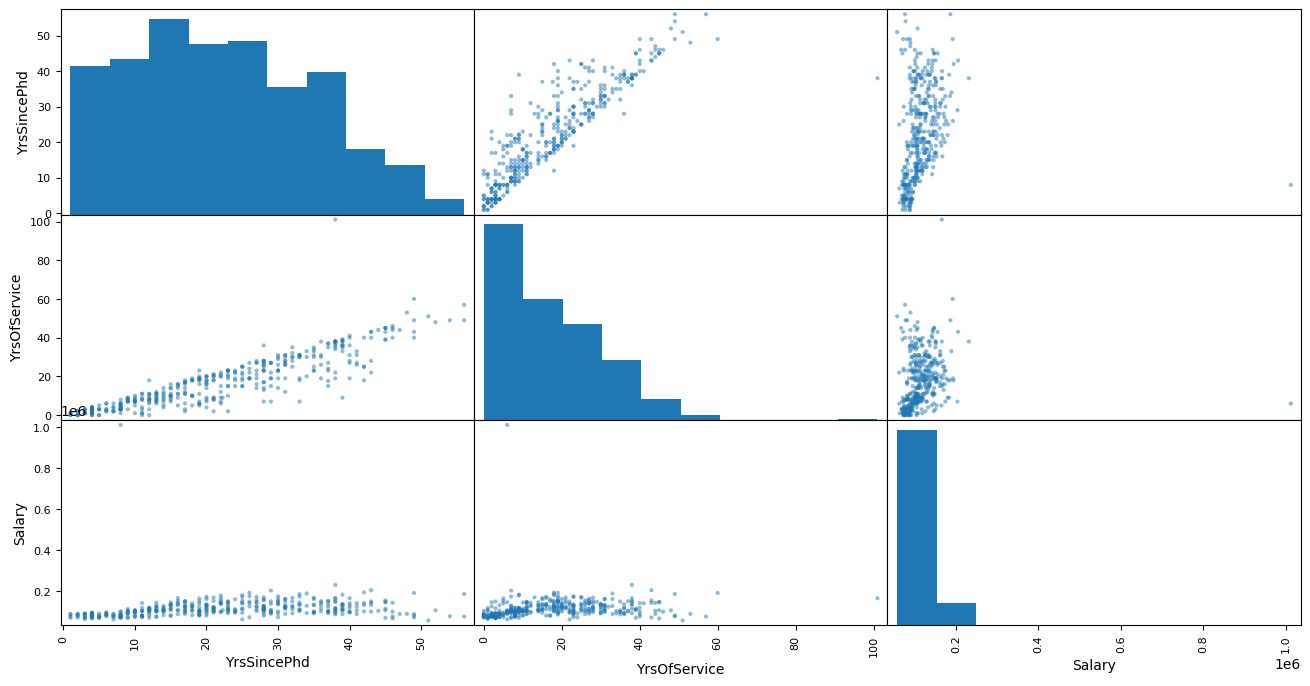

In [13]:
pd.plotting.scatter_matrix(df,figsize=(16,8))

**Seems linear relationship with since Phd and years of service, may be colinear features? consider to drop either or take their principal component?**

### 3. Remove outliers

array([[<AxesSubplot:title={'center':'YrsSincePhd'}>,
        <AxesSubplot:title={'center':'YrsOfService'}>],
       [<AxesSubplot:title={'center':'Salary'}>, <AxesSubplot:>]],
      dtype=object)

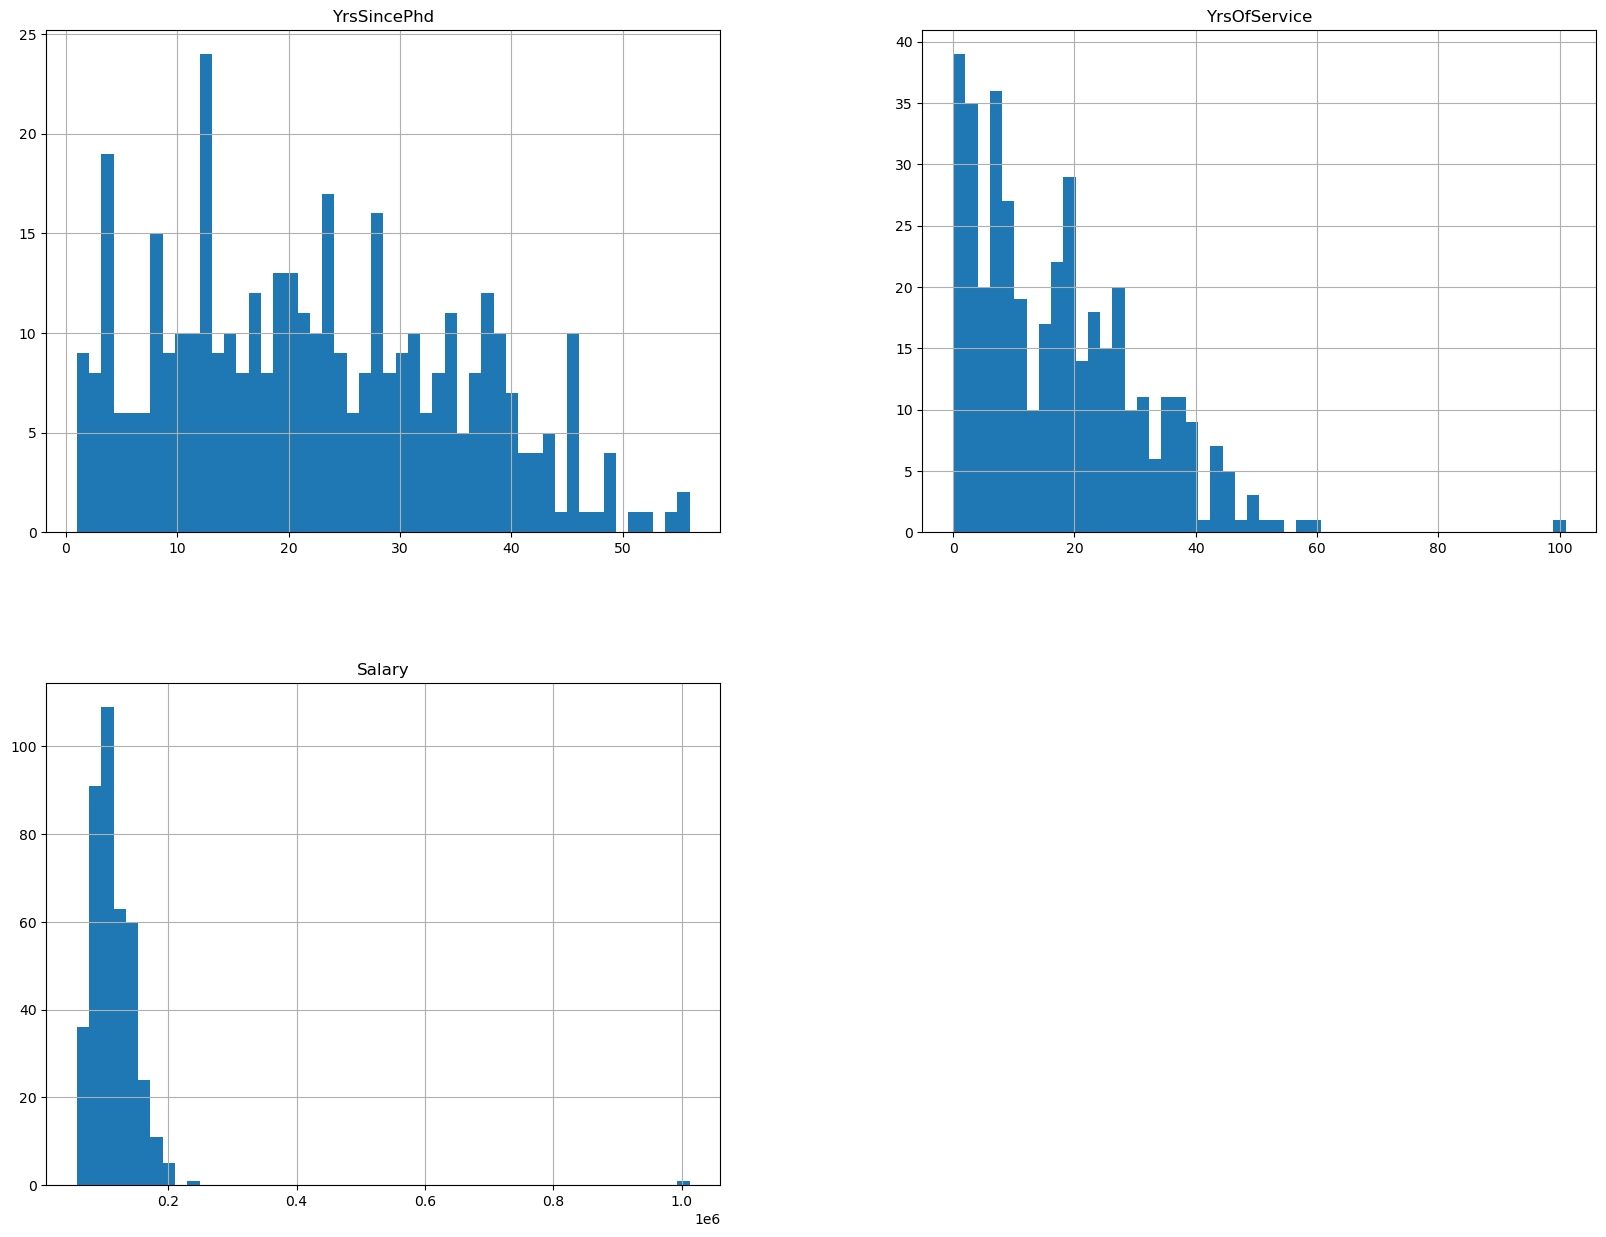

In [14]:
df._get_numeric_data().hist(bins=50,figsize=(20,15))

**OUTLIERS ???? Salary and years of service** X-axis is number of samples

In [15]:
df._get_numeric_data().sort_values(by='Salary',ascending=False).head(10)

,YrsSincePhd,YrsOfService,Salary
173,8.0,6.0,1012100
43,38.0,38.0,231545
370,43.0,43.0,205500
254,29.0,7.0,204000
276,42.0,18.0,194800
78,26.0,19.0,193000
336,49.0,60.0,192253
203,34.0,33.0,189409
356,56.0,49.0,186960
395,33.0,18.0,186023


**Professors make money?! wtf**

In [16]:
df.loc[173,:]

Rank            AssocProf
Discipline              B
YrsSincePhd           8.0
YrsOfService          6.0
Sex                  Male
Salary            1012100
Name: 173, dtype: object

In [17]:
df.drop(axis=0,index=173,inplace=True)
df._get_numeric_data().sort_values(by='Salary',ascending=False).head(10)

,YrsSincePhd,YrsOfService,Salary
43,38.0,38.0,231545
370,43.0,43.0,205500
254,29.0,7.0,204000
276,42.0,18.0,194800
78,26.0,19.0,193000
336,49.0,60.0,192253
203,34.0,33.0,189409
356,56.0,49.0,186960
395,33.0,18.0,186023
297,39.0,9.0,183800


***Type your EDA code here***

In [18]:
df._get_numeric_data().sort_values(by='YrsOfService',ascending=False).head(10)

,YrsSincePhd,YrsOfService,Salary
96,38.0,101.0,166024
336,49.0,60.0,192253
135,56.0,57.0,76840
199,48.0,53.0,90000
287,51.0,51.0,57800
129,54.0,49.0,78162
290,49.0,49.0,81800
356,56.0,49.0,186960
281,52.0,48.0,107200
284,46.0,46.0,100600


**101 years of service lolz...**

In [19]:
df.drop(index=96,axis=0,inplace=True)


array([[<AxesSubplot:title={'center':'YrsSincePhd'}>,
        <AxesSubplot:title={'center':'YrsOfService'}>],
       [<AxesSubplot:title={'center':'Salary'}>, <AxesSubplot:>]],
      dtype=object)

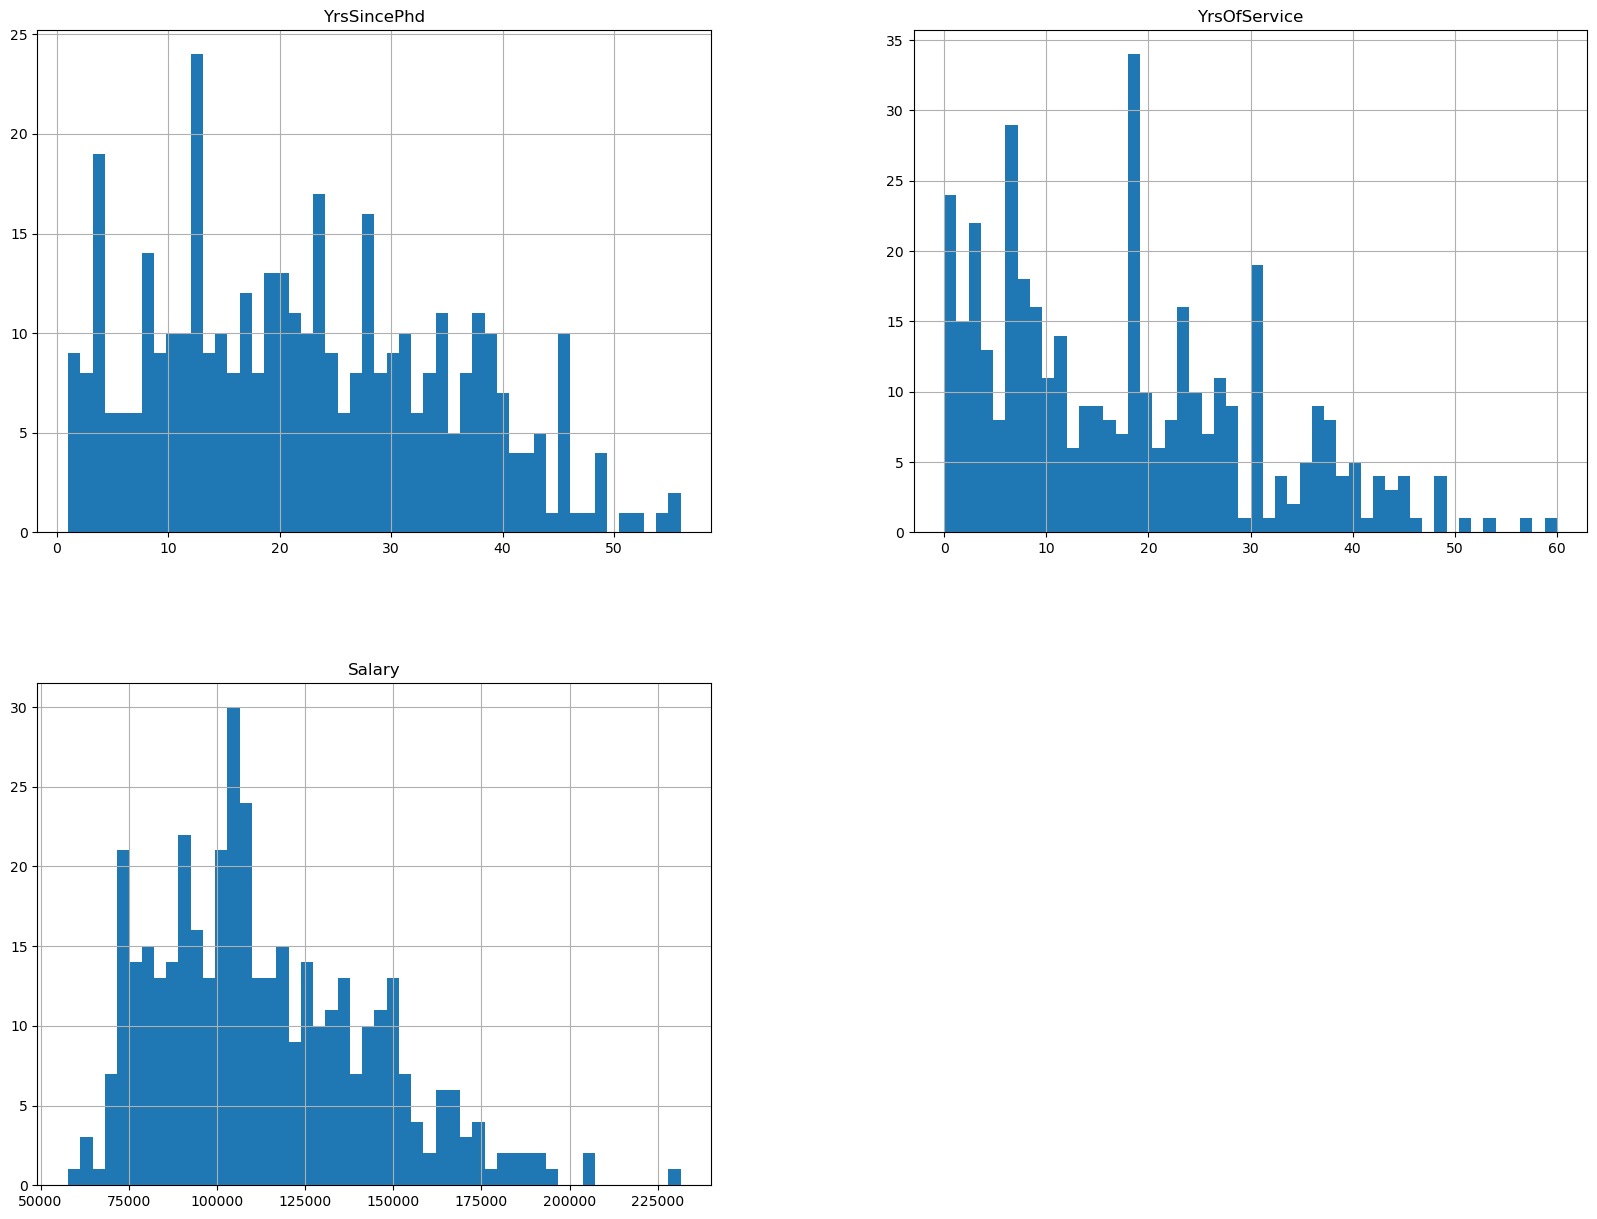

In [20]:
df._get_numeric_data().hist(bins=50,figsize=(20,15))

***In general it is a good idea to reset the index if we have removed any rows in the original dataset***

**No more outliers relatively**

### 4. Separate numerical features from categorical features

In [21]:
num_col = df._get_numeric_data().columns.tolist()
cat_col = df.select_dtypes(include='object').columns.tolist()
print(f"Numeric - {num_col}\nCategorical - {cat_col}")

Numeric - ['YrsSincePhd', 'YrsOfService', 'Salary']
Categorical - ['Rank', 'Discipline', 'Sex']


In [22]:
df[num_col].corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.907378,0.417932
YrsOfService,0.907378,1.000000,0.330327
Salary,0.417932,0.330327,1.000000


### 5. Build a two-factors model to predict the Salary with both YrsSincePhd and YrsOfService as its correlation is higher

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X,y = df[['YrsSincePhd','YrsOfService']],df.Salary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
print(f"Bias - {model.intercept_}\nCoeff - {model.coef_}")

Bias - 88654.87407548653
Coeff - [1599.84146449 -608.49886818]


In [24]:
from sklearn import metrics

y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 21609.926839007763
Mean Squared Error: 750648727.6139358
Root Mean Squared Error: 27397.969406763266
R-squared: 0.13389459453338814


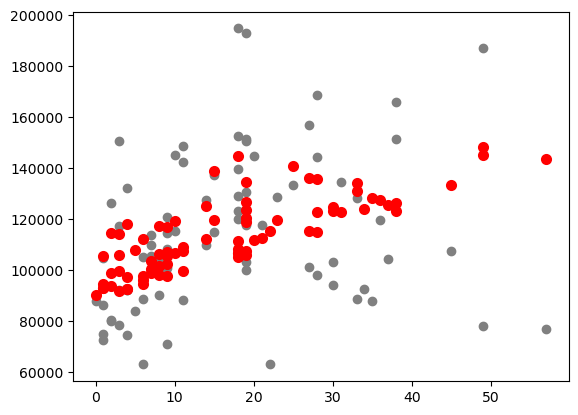

In [25]:
plt.scatter(X_test.YrsOfService, y_test,  color='gray')
plt.scatter(X_test.YrsOfService, y_pred, color='red', linewidth=2)
plt.show()

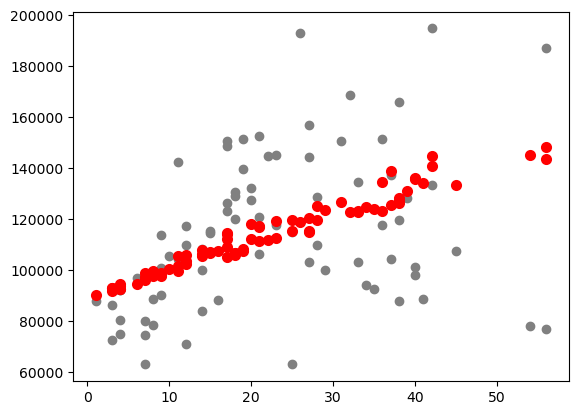

In [26]:
plt.scatter(X_test.YrsSincePhd, y_test,  color='gray')
plt.scatter(X_test.YrsSincePhd, y_pred, color='red', linewidth=2)
plt.show()

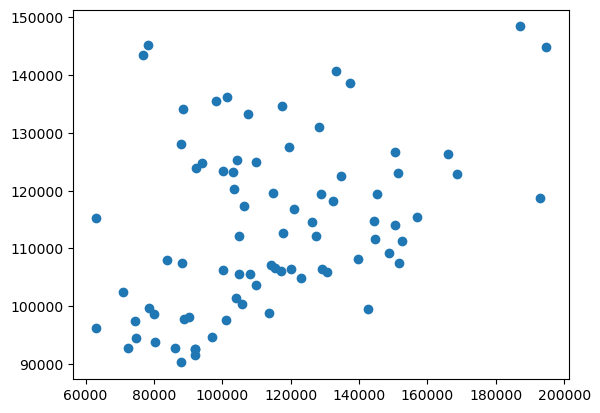

In [27]:
plt.scatter(y_test,y_pred)
plt.show()

**not a good fit**

***Type your code here***

In [28]:
import random

# perform a 10-fold cross validation
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))



Trial 0, R-squared: 0.04613534246617912,  Slope: [1796.17616591 -807.00593269], Intercept: 88625.68397499082,  
Trial 1, R-squared: 0.25776839602645707,  Slope: [1552.01289722 -711.7151504 ], Intercept: 90531.53779982275,  
Trial 2, R-squared: 0.2135494107944269,  Slope: [1571.61006985 -680.83357703], Intercept: 90787.24150055795,  
Trial 3, R-squared: 0.1717412558368261,  Slope: [1682.08553283 -810.07947299], Intercept: 89787.71728755365,  
Trial 4, R-squared: 0.17281001069933577,  Slope: [1514.39762852 -586.91034594], Intercept: 90828.84772302158,  
Trial 5, R-squared: 0.19003041667071097,  Slope: [1535.95382023 -608.51482023], Intercept: 91330.08721185758,  
Trial 6, R-squared: 0.04664582830794339,  Slope: [1685.50150907 -694.93665459], Intercept: 89683.00623185141,  
Trial 7, R-squared: 0.21772611213068993,  Slope: [1529.20140652 -646.53032975], Intercept: 91669.75458561083,  
Trial 8, R-squared: 0.12212788397778651,  Slope: [1519.26351895 -587.95505524], Intercept: 88981.294930039

**Doesnt seem to pass validation of training on different samples of the dataset**

In [29]:
# build first model with only numerical features
# check if it pass cross validation
# use one-hot encoding to include the categorical features in additional to the numerical features
# build a second model that include both numerical and categorical features
# comment on the results

df.head()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
0,Prof,B,19.0,18.0,Male,139750
1,Prof,B,20.0,16.0,Male,173200
2,AsstProf,B,4.0,3.0,Male,79750
3,Prof,B,45.0,39.0,Male,115000
4,Prof,B,40.0,41.0,Male,141500


In [30]:
num_cat = pd.get_dummies(df, columns=cat_col)
num_cat.head()

,YrsSincePhd,YrsOfService,Salary,Rank_AssocProf,Rank_AsstProf,Rank_Prof,Discipline_A,Discipline_B,Sex_Female,Sex_Male
0,19.0,18.0,139750,0,0,1,0,1,0,1
1,20.0,16.0,173200,0,0,1,0,1,0,1
2,4.0,3.0,79750,0,1,0,0,1,0,1
3,45.0,39.0,115000,0,0,1,0,1,0,1
4,40.0,41.0,141500,0,0,1,0,1,0,1


In [31]:
X,y = num_cat.drop('Salary',axis=1),num_cat.Salary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)
print(f"Bias - {model.intercept_}\nCoeff - {model.coef_}")
y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))

Bias - 94302.62275965183
Coeff - [   605.99941384   -493.84140989  -6337.22796995 -18941.71052481
  25278.93849476  -7349.31876164   7349.31876164  -1481.93017513
   1481.93017513]
Mean Absolute Error: 16040.928482494612
Mean Squared Error: 466649653.1005761
Root Mean Squared Error: 21602.075203567274
R-squared: 0.46157533858181043


**A professors salary seems to have multi codepencies while being multi faceted in nature. Although using more categorical features increased R^2 performance, there is still not enough signal for the data features to explain a professors salary.**

### Part 2 Build a Logistic model for predicting wine taste

### Original dataset was based on
https://archive.ics.uci.edu/ml/datasets/wine+quality

### However, we will be using a slightly modified version of the dataset as follow

In [32]:
df = pd.read_csv(w)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal


<AxesSubplot:xlabel='taste', ylabel='count'>

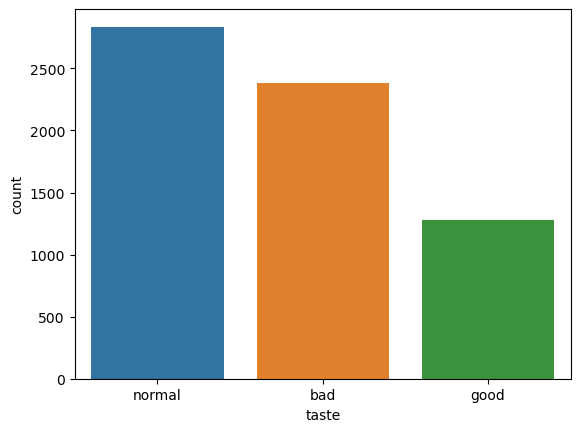

In [33]:
sns.countplot(x='taste',data=df)

***This dataset has both the white and red wine***

<AxesSubplot:xlabel='taste', ylabel='count'>

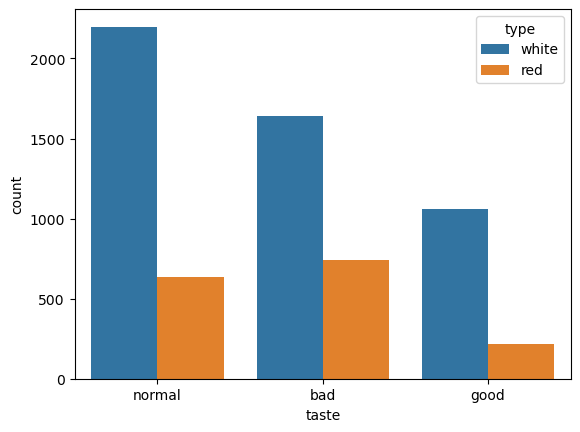

In [34]:
sns.countplot(x='taste', hue='type', data=df)

### Your task in this Project is to build the best predictive model to predict if a wine will be of good taste (ie we do not care if it is normal or bad taste, just good vs not good taste)

***Therefore the first thing you need to do is to create the right target variable***

In [35]:
df['good_taste'] = df['taste'].apply(lambda x: 1 if x == 'good' else 0)

In [36]:
# drop the taste column, otherwise you have your answer as one of the feature
df.drop(['taste'], axis=1, inplace=True)

In [37]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,good_taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,0


<AxesSubplot:xlabel='good_taste', ylabel='count'>

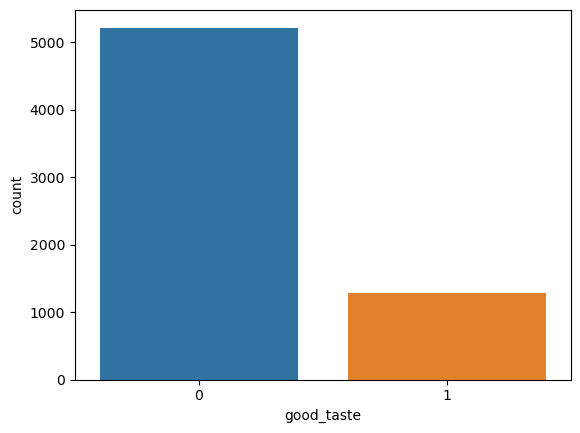

In [38]:
sns.countplot(x='good_taste',data=df)

**You should follow the usual best practice in building models such as**

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* use one-hot encoding to take care categorical variables
* normalize numerical features if needed
* use a model that can solve classification problem such as Logistic model
* examine performance of your model
* performed cross-validations (f1-score)

### EDA (checking missing values, removing outliers)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6498 entries, 0 to 6497
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6498 non-null   float64
 2   citric acid           6498 non-null   float64
 3   residual sugar        6498 non-null   float64
 4   chlorides             6498 non-null   float64
 5   free sulfur dioxide   6498 non-null   float64
 6   total sulfur dioxide  6498 non-null   float64
 7   density               6498 non-null   float64
 8   sulphates             6498 non-null   float64
 9   alcohol               6498 non-null   float64
 10  type                  6498 non-null   object 
 11  pHValue               6498 non-null   object 
 12  good_taste            6498 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 660.1+ KB


In [40]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste
count,6497.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000
mean,7.215307,0.339657,0.318650,5.442659,0.056038,30.523853,115.745691,0.996135,0.531251,10.492156,0.196522
std,1.296434,0.164625,0.145313,4.757664,0.035032,17.748427,56.517576,0.116587,0.148801,1.192964,0.397398
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.125000,0.992340,0.430000,9.500000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,0.510000,10.300000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,0.600000,11.300000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,10.389800,2.000000,14.900000,1.000000


In [41]:
num_col = df._get_numeric_data().columns.tolist()
cat_col = df.select_dtypes(include='object').columns.tolist()
print(f"Numeric - {num_col}\nCategorical - {cat_col}")

Numeric - ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'good_taste']
Categorical - ['type', 'pHValue']


In [42]:
df[num_col].corr().style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.017370,0.299568,-0.095452,-0.049447
volatile acidity,0.219008,1.000000,-0.378003,-0.195956,0.377069,-0.352516,-0.414479,0.053872,0.226013,-0.037737,-0.151682
citric acid,0.324436,-0.378003,1.000000,0.142345,0.039076,0.133054,0.195248,0.026370,0.056104,-0.010262,0.054383
residual sugar,-0.111981,-0.195956,0.142345,1.000000,-0.129013,0.402908,0.495442,0.170825,-0.185820,-0.359528,-0.063928
chlorides,0.298195,0.377069,0.039076,-0.129013,1.000000,-0.195090,-0.279607,0.015651,0.395483,-0.256629,-0.161825
free sulfur dioxide,-0.282735,-0.352516,0.133054,0.402908,-0.195090,1.000000,0.720907,-0.015002,-0.188383,-0.179942,0.014807
total sulfur dioxide,-0.329054,-0.414479,0.195248,0.495442,-0.279607,0.720907,1.000000,0.010499,-0.275729,-0.265625,-0.051234
density,0.017370,0.053872,0.026370,0.170825,0.015651,-0.015002,0.010499,1.000000,0.019847,-0.005169,-0.013186
sulphates,0.299568,0.226013,0.056104,-0.185820,0.395483,-0.188383,-0.275729,0.019847,1.000000,-0.003251,0.034026
alcohol,-0.095452,-0.037737,-0.010262,-0.359528,-0.256629,-0.179942,-0.265625,-0.005169,-0.003251,1.000000,0.390219


In [43]:
df.isna().sum()

fixed acidity           1
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
pHValue                 0
good_taste              0
dtype: int64

### Fix missing values

In [44]:
df.shape

(6498, 13)

In [45]:
df.dropna(inplace=True)
df.shape

(6497, 13)

## Checking for outliers

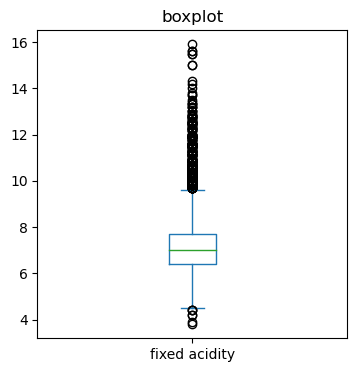

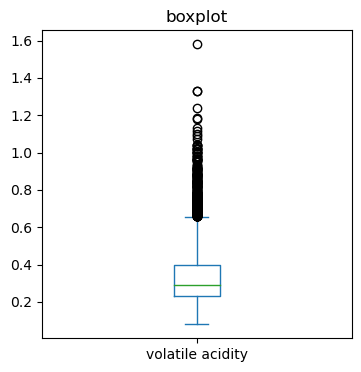

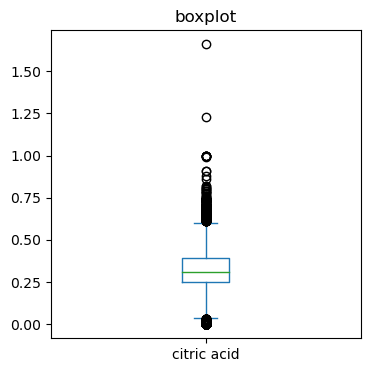

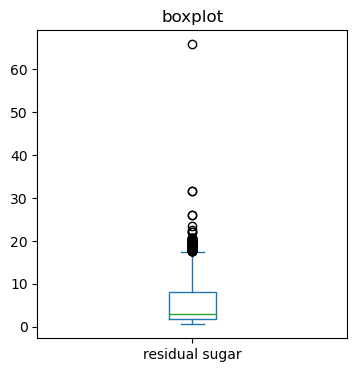

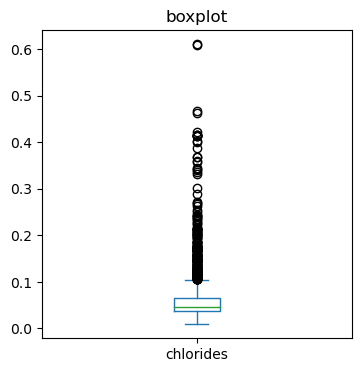

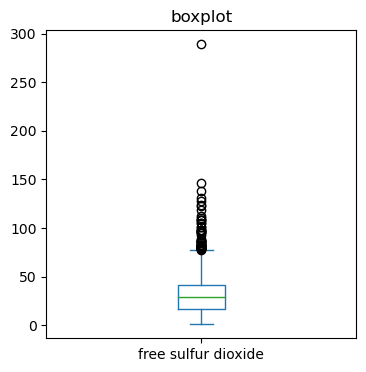

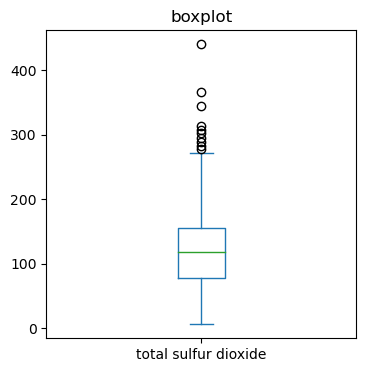

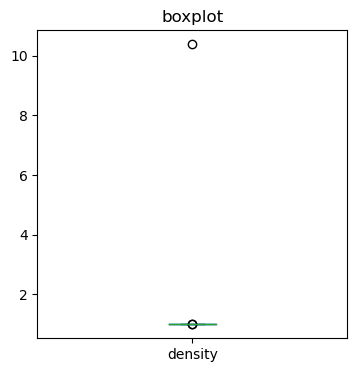

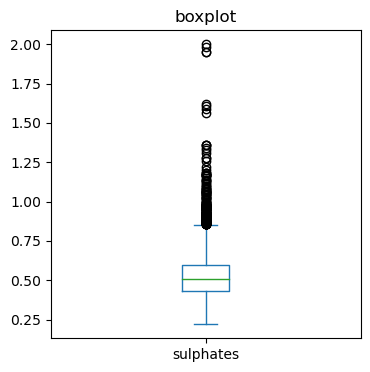

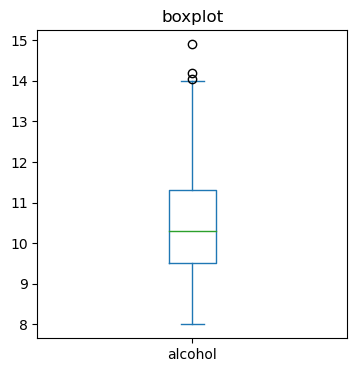

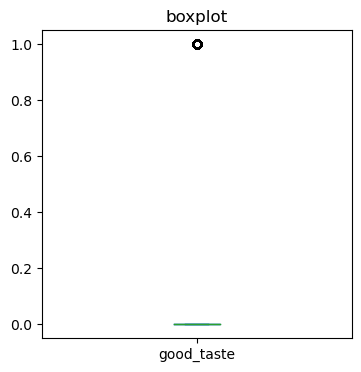

In [46]:
for col in num_col:
    ax = df[col].plot(kind='box', title='boxplot',figsize=(4,4))
    plt.show()

### check density

In [47]:
df.density.sort_values(ascending=False)

2782    10.38980
1654     1.01030
1664     1.01030
6333     1.00369
6334     1.00369
          ...   
3677     0.98742
3774     0.98740
3711     0.98722
2946     0.98713
4150     0.98711
Name: density, Length: 6497, dtype: float64

In [48]:
df.density.sort_values(ascending=True)

4150     0.98711
2946     0.98713
3711     0.98722
3774     0.98740
3677     0.98742
          ...   
6333     1.00369
6334     1.00369
1654     1.01030
1664     1.01030
2782    10.38980
Name: density, Length: 6497, dtype: float64

### check index 2782

In [49]:
df.loc[2782-2:2782+2,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,good_taste
2780,6.7,0.200,0.37,1.65,0.025,42.0,103.0,0.99022,0.45,11.4,white,very acidic,0
2781,6.2,0.235,0.34,1.90,0.036,4.0,117.0,0.99032,0.44,12.2,white,midly acidic,0
2782,7.8,0.965,0.60,65.80,0.074,8.0,160.0,10.38980,0.69,11.7,white,quite acidic,0
2783,7.1,0.200,0.31,6.85,0.053,32.0,211.0,0.99587,0.59,10.4,white,quite acidic,0
2784,7.1,0.200,0.31,7.40,0.053,32.0,211.0,0.99587,0.59,10.4,white,quite acidic,0


In [50]:
df.drop(index=2782,axis=0,inplace=True)
df.loc[2782-2:2782+2,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,good_taste
2780,6.7,0.200,0.37,1.65,0.025,42.0,103.0,0.99022,0.45,11.4,white,very acidic,0
2781,6.2,0.235,0.34,1.90,0.036,4.0,117.0,0.99032,0.44,12.2,white,midly acidic,0
2783,7.1,0.200,0.31,6.85,0.053,32.0,211.0,0.99587,0.59,10.4,white,quite acidic,0
2784,7.1,0.200,0.31,7.40,0.053,32.0,211.0,0.99587,0.59,10.4,white,quite acidic,0


In [51]:
df['residual sugar'].sort_values(ascending=False)

1664    31.60
1654    31.60
3620    26.05
3624    26.05
1609    23.50
        ...  
4683     0.70
2755     0.70
2588     0.70
2046     0.60
2040     0.60
Name: residual sugar, Length: 6496, dtype: float64

**residual sugar looks fine**

## Check feature distributions

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'sulphates'}>],
       [<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'good_taste'}>, <AxesSubplot:>]],
      dtype=object)

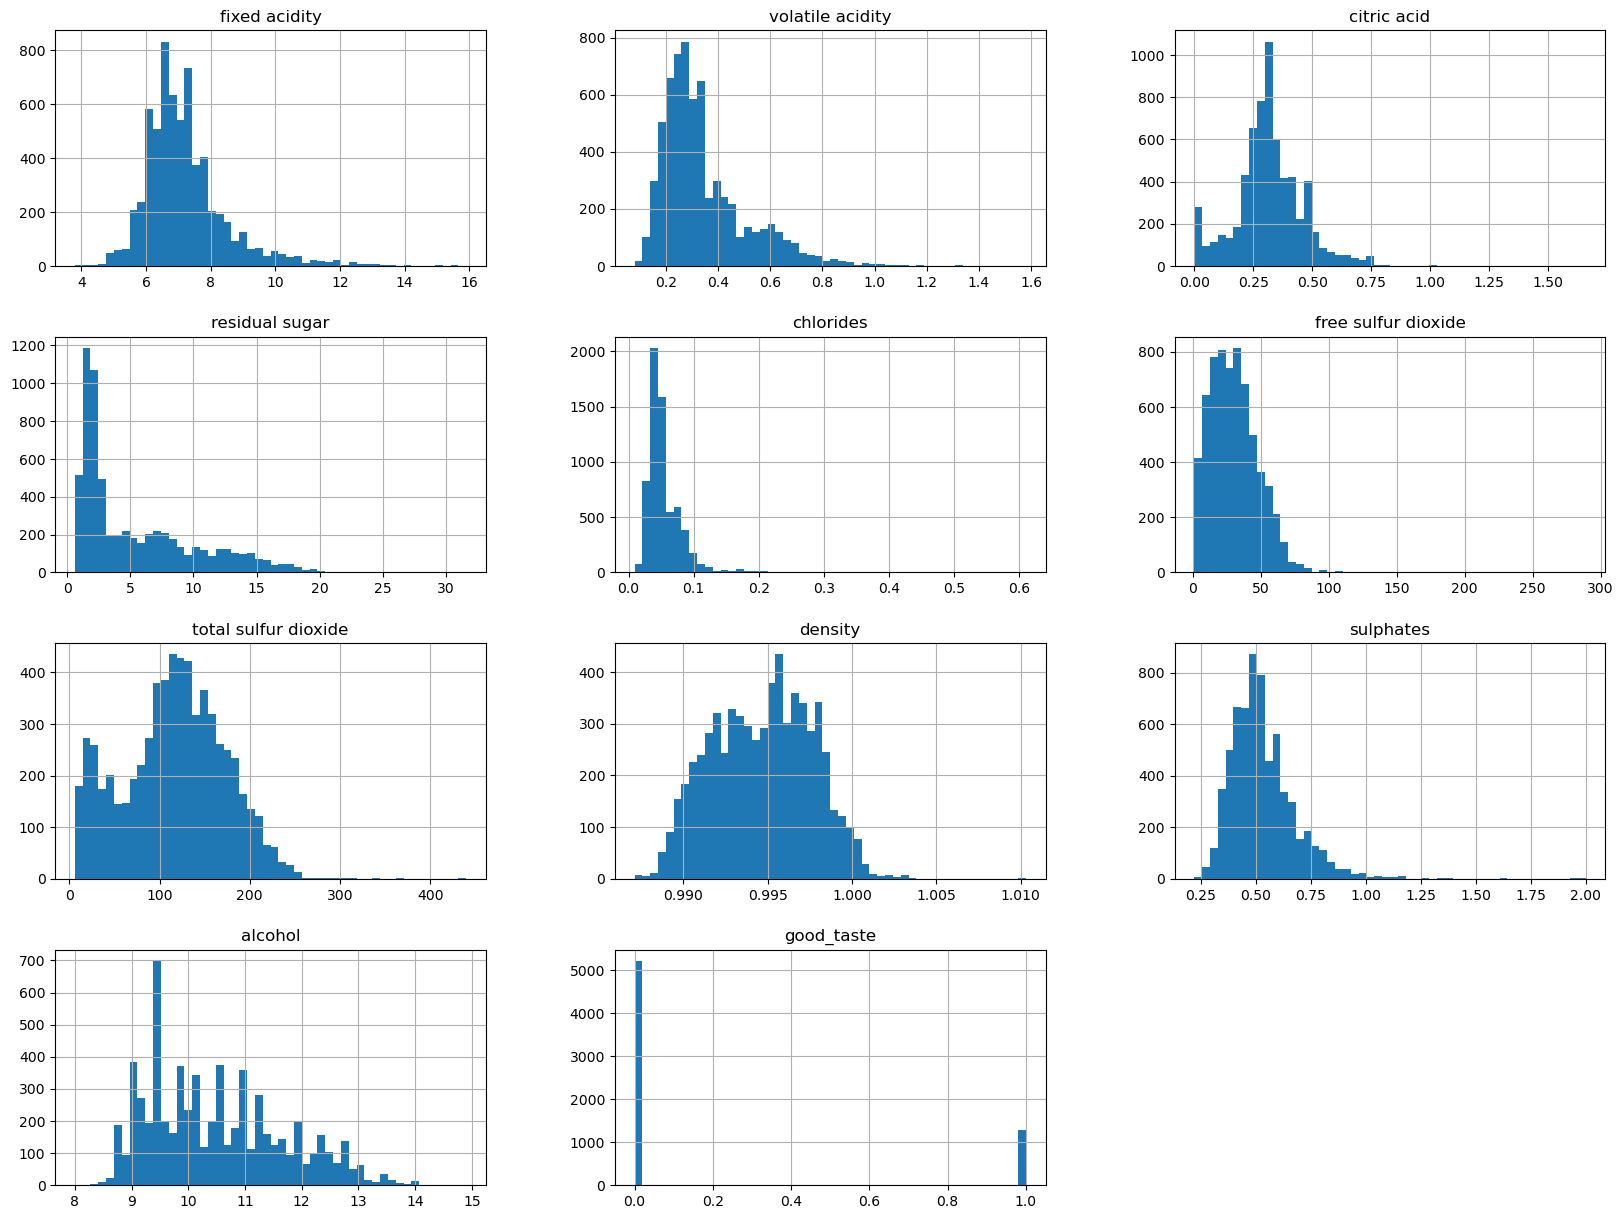

In [52]:
df._get_numeric_data().hist(bins=50,figsize=(20,15))

## performed basic exploration of relationship, with plots and graphs

array([[<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='chlorides', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='density', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='alcohol', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='good_taste', ylabel='fixed acidity'>],
       [<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='volatile acidity'>,
        <AxesSubp

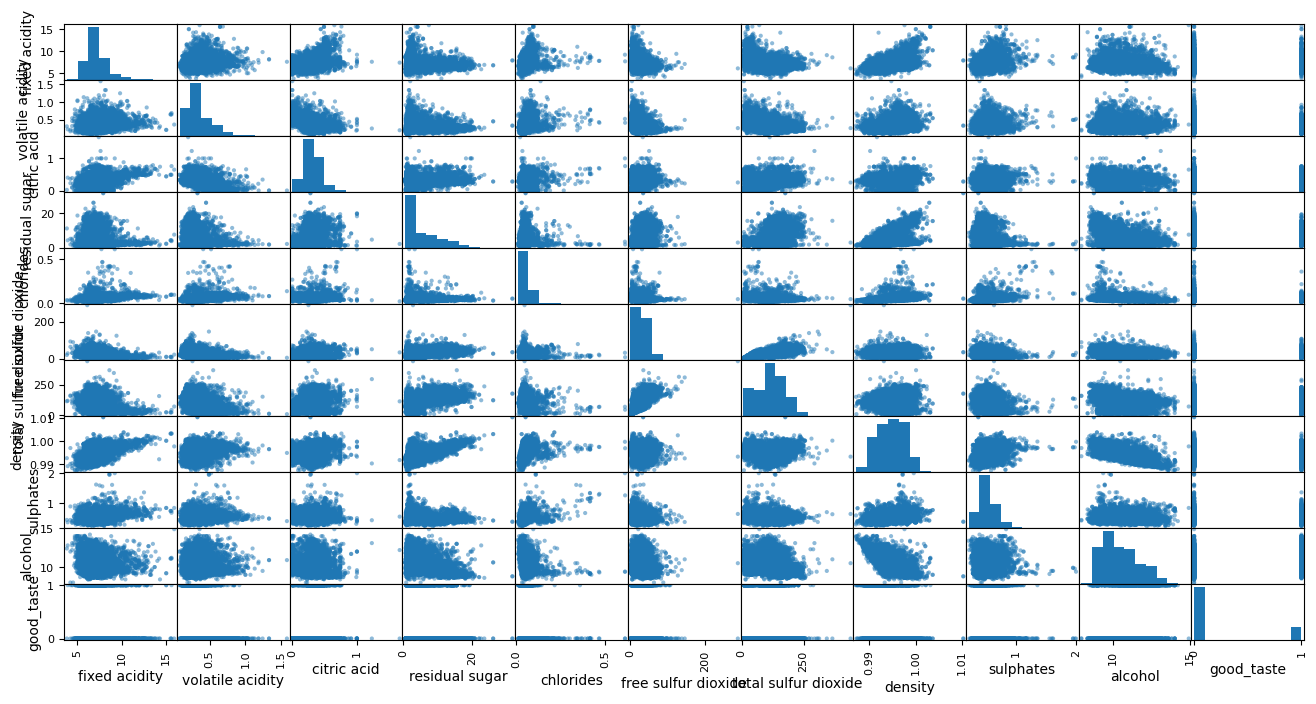

In [53]:
pd.plotting.scatter_matrix(df,figsize=(16,8))

***Type your code here***

### One hot encoding

In [54]:
cat_col

['type', 'pHValue']

In [55]:
num_cat = pd.get_dummies(df, columns=cat_col)
num_cat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste,type_red,type_white,pHValue_acidic,pHValue_extremly acidic,pHValue_lightly acidic,pHValue_midly acidic,pHValue_quite acidic,pHValue_very acidic
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,0,0,1,0,0,0,0,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,0,0,1,0,0,0,0,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,0,0,1,0,0,0,0,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,0,0,1,0,0,0,0,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,0,0,1,0,0,0,0,0,1


### feature selection

In [56]:
X,y = num_cat.drop('good_taste',axis=1),num_cat.good_taste
f"{X.shape} {y.shape}"

'(6496, 18) (6496,)'

In [57]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
f"{X_train.shape}/{y_train.shape} - {X_test.shape}/{y_test.shape}"

'(5196, 18)/(5196,) - (1300, 18)/(1300,)'

### feature standardization

In [58]:
#normalizer = StandardScaler()
#X_train = normalizer.fit_transform(X_train)

**unnecessary gets worse performance**

### Class imblance Smote oversample

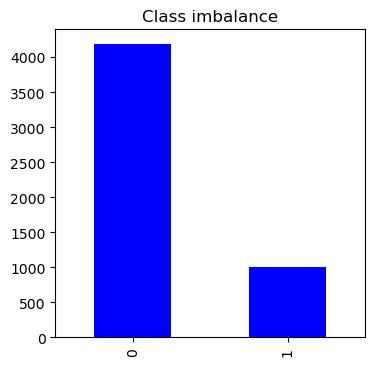

In [59]:
ax = pd.Series(y_train).value_counts().plot(kind='bar',
                                    figsize=(4,4),
                                    title="Class imbalance", color='blue')

In [60]:
# build your model
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

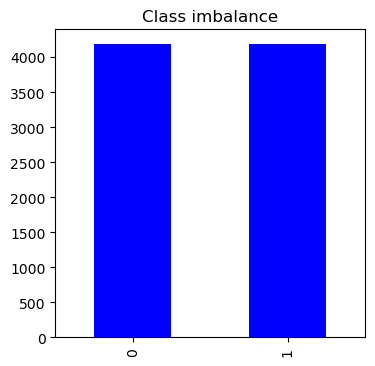

In [61]:
ax = pd.Series(y_train).value_counts().plot(kind='bar',
                                    figsize=(4,4),
                                    title="Class imbalance", color='blue')

### fit classification model

In [62]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred.shape

(1300,)

### eval model

In [63]:
from sklearn.metrics import f1_score

print("Class average: ",f1_score(y_test, y_pred, average='macro'))
print("Accumulative f1: ",f1_score(y_test, y_pred, average='micro'))
print("Weighted by sample f1: ",f1_score(y_test, y_pred, average='weighted'))

Class average:  0.6966428083252573
Accumulative f1:  0.7838461538461537
Weighted by sample f1:  0.7927291345233182


In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1034
           1       0.48      0.61      0.53       266

    accuracy                           0.78      1300
   macro avg       0.68      0.72      0.70      1300
weighted avg       0.81      0.78      0.79      1300



### validate model

In [65]:
import random

def validate(X:pd.DataFrame,y:pd.Series)->None:
    sm = SMOTE(random_state=42)
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=(i+1)*1000)
        X_train, y_train = sm.fit_resample(X_train, y_train)
        
        clf = LogisticRegression(random_state=42)
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        print(f"Trial - {i} Class average: ",f1_score(y_test, y_pred, average='macro'))
        print(f"Trial - {i} Accumulative f1: ",f1_score(y_test, y_pred, average='micro'))
        print(f"Trial - {i} Weighted by sample f1: ",f1_score(y_test, y_pred, average='weighted'))
        print(classification_report(y_test, y_pred))
        print()
        print()

validate(X,y)

Trial - 0 Class average:  0.6790736145574856
Trial - 0 Accumulative f1:  0.7761538461538462
Trial - 0 Weighted by sample f1:  0.7917681491378763
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1065
           1       0.42      0.63      0.50       235

    accuracy                           0.78      1300
   macro avg       0.66      0.72      0.68      1300
weighted avg       0.82      0.78      0.79      1300



Trial - 1 Class average:  0.6258757096781884
Trial - 1 Accumulative f1:  0.74
Trial - 1 Weighted by sample f1:  0.7501726386916379
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1041
           1       0.38      0.47      0.42       259

    accuracy                           0.74      1300
   macro avg       0.62      0.64      0.63      1300
weighted avg       0.76      0.74      0.75      1300



Trial - 2 Class average:  0.6684057971014492
Trial - 2 Accumulativ

***Comment on your results***

***White wine and Red wine are different type of wine. Answer the question whether your model will perform better for the white wine or the red wine or similar. You will need to support your arguments by evidence such as separate the dataset and build separate models etc.***

***Type your code and answers here***

fixed acidity Score: 0.04277
volatile acidity Score: -3.41588
citric acid Score: 1.15912
residual sugar Score: 0.05980
chlorides Score: -0.50571
free sulfur dioxide Score: 0.01457
total sulfur dioxide Score: -0.00542
density Score: -2.51676
sulphates Score: 0.81621
alcohol Score: 0.90976
type_red Score: -1.78984
type_white Score: -1.67327
pHValue_acidic Score: -1.54467
pHValue_extremly acidic Score: -3.53073
pHValue_lightly acidic Score: -0.15955
pHValue_midly acidic Score: -4.20406
pHValue_quite acidic Score: -3.79396
pHValue_very acidic Score: -3.80343


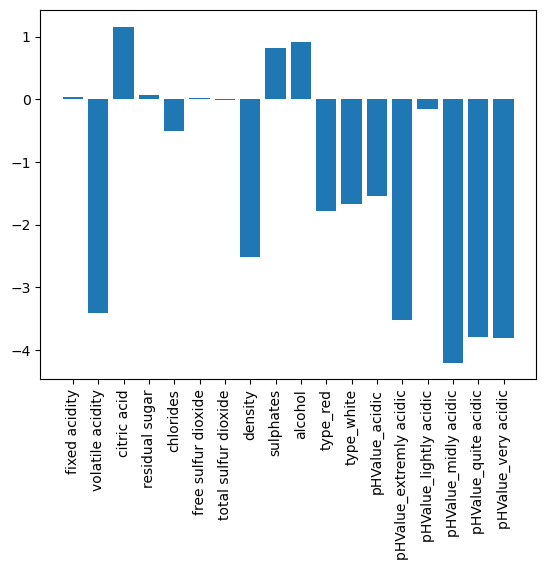

In [66]:
# get importance
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
     print('%s Score: %.5f' % (X.columns[i],v))
# plot feature importance
plt.bar([X.columns[x] for x in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.show()

In [67]:
X.type_red.sum()

1599

In [68]:
X.type_white.sum()

4897

In [69]:
twine = pd.concat([X_test,y_test],axis=1)
twine['pred'] = y_pred
twine.head()
        

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type_red,type_white,pHValue_acidic,pHValue_extremly acidic,pHValue_lightly acidic,pHValue_midly acidic,pHValue_quite acidic,pHValue_very acidic,good_taste,pred
3103,6.5,0.29,0.26,7.0,0.040,18.0,113.0,0.99366,0.38,10.2,0,1,0,0,0,0,0,1,0,0
1420,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,0.40,10.8,0,1,0,0,0,0,0,1,1,1
2253,7.2,0.29,0.20,7.7,0.046,51.0,174.0,0.99582,0.52,9.5,0,1,0,0,0,0,0,1,0,0
1769,6.6,0.37,0.07,1.4,0.048,58.0,144.0,0.99220,0.38,10.0,0,1,0,0,0,0,0,1,0,0
4032,6.4,0.29,0.57,1.0,0.060,15.0,120.0,0.99240,0.41,9.5,0,1,0,0,0,0,0,1,0,0


In [70]:
red_test,red_pred = twine.loc[twine.type_red == 1].good_taste,twine.loc[twine.type_red == 1].pred
print(f"Class average: ",f1_score(red_test, red_pred, average='macro'))
print(f"Accumulative f1: ",f1_score(red_test, red_pred, average='micro'))
print(f"Weighted by sample f1: ",f1_score(red_test, red_pred, average='weighted'))
print(classification_report(red_test, red_pred))

Class average:  0.7084591825958391
Accumulative f1:  0.8660436137071651
Weighted by sample f1:  0.8680468056280718
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       280
           1       0.48      0.51      0.49        41

    accuracy                           0.87       321
   macro avg       0.70      0.72      0.71       321
weighted avg       0.87      0.87      0.87       321



In [71]:
white_test,white_pred = twine.loc[twine.type_white == 1].good_taste,twine.loc[twine.type_white == 1].pred
print(f"Class average: ",f1_score(white_test, white_pred, average='macro'))
print(f"Accumulative f1: ",f1_score(white_test, white_pred, average='micro'))
print(f"Weighted by sample f1: ",f1_score(white_test, white_pred, average='weighted'))
print(classification_report(white_test, white_pred))

Class average:  0.6876313813813815
Accumulative f1:  0.7568947906026557
Weighted by sample f1:  0.7671115190778114
              precision    recall  f1-score   support

           0       0.88      0.80      0.83       754
           1       0.48      0.62      0.54       225

    accuracy                           0.76       979
   macro avg       0.68      0.71      0.69       979
weighted avg       0.78      0.76      0.77       979



**Observing the logistic regression coefficients of type_red and type_white, the logistic regression model weights both type_red and type_white equally. However, type_red and type_white don't have equal number of available samples, 1599 type_red samples and 4897 type_white samples in the available dataset respectively. Therefore as shown above, the logistic regression model infers more information from the type_white features and can thus be able to perform better on samples that are of type_white wine.**